In [187]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [188]:
csvfilename = 'logs/1_xiaoxiong_Controller_2017-09-01-16-19-38.csv'
df = pd.read_csv(csvfilename, header=None, names=['abstime','time','posx','posy','posz','roty','rotx'], skiprows=1, skipfooter=1)
df.head()


C:\Users\ShenShen\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  


,abstime,time,posx,posy,posz,roty,rotx
0,2017-09-01T16:19:39.635,88.97661,-6.0,1.05,-2.77,295.8139,4.205431
1,2017-09-01T16:19:39.931,89.27708,-6.0,1.05,-2.77,301.2080,2.261689
2,2017-09-01T16:19:40.232,89.57829,-6.0,1.05,-2.77,282.0147,32.789770
3,2017-09-01T16:19:40.537,89.88255,-6.0,1.05,-2.77,276.1622,27.215370
4,2017-09-01T16:19:40.838,90.18325,-6.0,1.05,-2.77,284.8096,19.125920


In [189]:
P = 1.0*np.eye(9)

In [190]:
dt = 0.3 # Time Step between Filter Steps

A = np.matrix([[1.0, 0.0, 0.0, dt, 0.0, 0.0, 1/2.0*dt**2, 0.0, 0.0],
              [0.0, 1.0, 0.0, 0.0,  dt, 0.0, 0.0, 1/2.0*dt**2, 0.0],
              [0.0, 0.0, 1.0, 0.0, 0.0,  dt, 0.0, 0.0, 1/2.0*dt**2],
              [0.0, 0.0, 0.0, 1.0, 0.0, 0.0,  dt, 0.0, 0.0],
              [0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0,  dt, 0.0],
              [0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0,  dt],
              [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0],
              [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0],
              [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0]])
print(A,A.shape)

[[ 1.     0.     0.     0.3    0.     0.     0.045  0.     0.   ]
 [ 0.     1.     0.     0.     0.3    0.     0.     0.045  0.   ]
 [ 0.     0.     1.     0.     0.     0.3    0.     0.     0.045]
 [ 0.     0.     0.     1.     0.     0.     0.3    0.     0.   ]
 [ 0.     0.     0.     0.     1.     0.     0.     0.3    0.   ]
 [ 0.     0.     0.     0.     0.     1.     0.     0.     0.3  ]
 [ 0.     0.     0.     0.     0.     0.     1.     0.     0.   ]
 [ 0.     0.     0.     0.     0.     0.     0.     1.     0.   ]
 [ 0.     0.     0.     0.     0.     0.     0.     0.     1.   ]] (9, 9)


In [191]:
H = np.matrix([[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
               [0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
               [0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]])
print(H, H.shape)

[[ 1.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  1.  0.  0.  0.  0.  0.  0.]] (3, 9)


In [192]:
rp = 0.01  # Noise of Position Measurement
R = np.matrix([[rp, 0.0, 0.0],
               [0.0, rp, 0.0],
               [0.0, 0.0, rp]])
print(R, R.shape)

[[ 0.01  0.    0.  ]
 [ 0.    0.01  0.  ]
 [ 0.    0.    0.01]] (3, 3)


In [193]:
sa = 0.05
G = np.matrix([[1/2.0*dt**2],
               [1/2.0*dt**2],
               [1/2.0*dt**2],
               [dt],
               [dt],
               [dt],
               [1.0],
               [1.0],
               [1.0]])
Q = G*G.T*sa**2

print(Q,Q.shape)

[[  5.06250000e-06   5.06250000e-06   5.06250000e-06   3.37500000e-05
    3.37500000e-05   3.37500000e-05   1.12500000e-04   1.12500000e-04
    1.12500000e-04]
 [  5.06250000e-06   5.06250000e-06   5.06250000e-06   3.37500000e-05
    3.37500000e-05   3.37500000e-05   1.12500000e-04   1.12500000e-04
    1.12500000e-04]
 [  5.06250000e-06   5.06250000e-06   5.06250000e-06   3.37500000e-05
    3.37500000e-05   3.37500000e-05   1.12500000e-04   1.12500000e-04
    1.12500000e-04]
 [  3.37500000e-05   3.37500000e-05   3.37500000e-05   2.25000000e-04
    2.25000000e-04   2.25000000e-04   7.50000000e-04   7.50000000e-04
    7.50000000e-04]
 [  3.37500000e-05   3.37500000e-05   3.37500000e-05   2.25000000e-04
    2.25000000e-04   2.25000000e-04   7.50000000e-04   7.50000000e-04
    7.50000000e-04]
 [  3.37500000e-05   3.37500000e-05   3.37500000e-05   2.25000000e-04
    2.25000000e-04   2.25000000e-04   7.50000000e-04   7.50000000e-04
    7.50000000e-04]
 [  1.12500000e-04   1.12500000e-04   1.

In [194]:
u = 0.0
B = np.matrix([[0.0],
               [0.0],
               [0.0],
               [0.0],
               [0.0],
               [0.0],
               [0.0],
               [0.0],
               [0.0]])
print(B, B.shape)

[[ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]] (9, 1)


In [195]:
I = np.eye(9)
print(I, I.shape)

[[ 1.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  1.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  1.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  1.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  1.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  1.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  1.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  1.]] (9, 9)


In [196]:
Xr=df['posx'].values
Yr=df['posy'].values
Zr=df['posz'].values
m=len(Xr)
print(m)

197


In [197]:
sp= 0.01 # Sigma for position noise

Xm = Xr + sp * (np.random.randn(m))
Ym = Yr + sp * (np.random.randn(m))
Zm = Zr + sp * (np.random.randn(m))

-34.5204171142 3.46325938065 0.884631607195


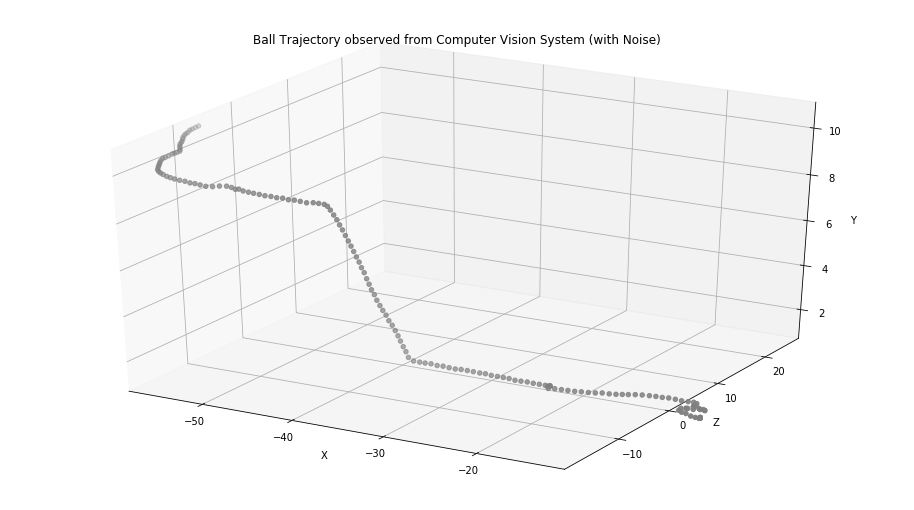

In [198]:
fig = plt.figure(figsize=(16,9))
ax = fig.add_subplot(111, projection='3d')
# 显示的时候Y、Z轴颠倒一下
ax.scatter(Xm, Zm, Ym, c='gray')
ax.set_xlabel('X')
ax.set_ylabel('Z')
ax.set_zlabel('Y')
plt.title('Ball Trajectory observed from Computer Vision System (with Noise)')

#ax.w_xaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))

# Axis equal
max_range = np.array([Xm.max()-Xm.min(), Ym.max()-Ym.min(), Zm.max()-Zm.min()]).max() / 3.0
mean_x = Xm.mean()
mean_y = Ym.mean()
mean_z = Zm.mean()
print(mean_x,mean_y,mean_z)
ax.set_xlim(mean_x - max_range, mean_x + max_range)
ax.set_ylim(mean_y - max_range, mean_y + max_range)
ax.set_zlim(mean_z, mean_z + 10)
plt.show()

In [199]:
measurements = np.vstack((Xm,Ym,Zm))
print(measurements,measurements.shape)

[[ -6.00626364e+00  -6.00125361e+00  -5.99977652e+00  -5.99151166e+00
   -6.01745754e+00  -5.99264386e+00  -6.00323342e+00  -6.00199519e+00
   -6.00917930e+00  -6.00217276e+00  -6.01171847e+00  -5.99443055e+00
   -6.00400504e+00  -6.01105062e+00  -6.01956682e+00  -5.98482313e+00
   -6.00143718e+00  -6.01222378e+00  -5.99545884e+00  -5.99222548e+00
   -6.00566936e+00  -6.00022439e+00  -5.99635487e+00  -6.00429221e+00
   -5.99525241e+00  -5.98418267e+00  -6.00497726e+00  -6.00996028e+00
   -6.00397462e+00  -6.00021991e+00  -5.98805153e+00  -6.01454431e+00
   -5.98426061e+00  -6.00438239e+00  -6.14987891e+00  -6.64092365e+00
   -7.25481305e+00  -7.88199277e+00  -8.46861893e+00  -8.99537403e+00
   -9.07544584e+00  -8.62130620e+00  -8.62829206e+00  -8.46822725e+00
   -7.94190110e+00  -7.30851830e+00  -6.86622027e+00  -6.84987995e+00
   -7.07783802e+00  -7.61183817e+00  -8.21288425e+00  -8.31049647e+00
   -8.31567296e+00  -8.32685296e+00  -8.33138096e+00  -8.40235093e+00
   -8.88001217e+00  

In [200]:
x = np.matrix([measurements[0][0], measurements[1][0],measurements[2][0], 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]).T
print(x, x.shape)

[[-6.00626364]
 [ 1.06080168]
 [-2.75420462]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]] (9, 1)


In [201]:
# Preallocation for Plotting
xt = []
yt = []
zt = []
dxt= []
dyt= []
dzt= []
ddxt=[]
ddyt=[]
ddzt=[]
Zx = []
Zy = []
Zz = []
Px = []
Py = []
Pz = []
Pdx= []
Pdy= []
Pdz= []
Pddx=[]
Pddy=[]
Pddz=[]
Kx = []
Ky = []
Kz = []
Kdx= []
Kdy= []
Kdz= []
Kddx=[]
Kddy=[]
Kddz=[]

In [202]:
for filterstep in range(m):    
    # Time Update (Prediction)
    # ========================
    # Project the state ahead
    x = A*x + B*u
    
    # Project the error covariance ahead
    P = A*P*A.T + Q    
    
    # Measurement Update (Correction)
    # ===============================
    # Compute the Kalman Gain
    S = H*P*H.T + R
    K = (P*H.T) * np.linalg.pinv(S)
    
    # Update the estimate via z
    Z = measurements[:,filterstep].reshape(H.shape[0],1)
    y = Z - (H*x)                            # Innovation or Residual
    x = x + (K*y)
    
    # Update the error covariance
    P = (I - (K*H))*P
    
    # Save states for Plotting
    xt.append(float(x[0]))
    yt.append(float(x[1]))
    zt.append(float(x[2]))
    dxt.append(float(x[3]))
    dyt.append(float(x[4]))
    dzt.append(float(x[5]))
    ddxt.append(float(x[6]))
    ddyt.append(float(x[7]))
    ddzt.append(float(x[8]))
    
    Zx.append(float(Z[0]))
    Zy.append(float(Z[1]))
    Zz.append(float(Z[2]))
    Px.append(float(P[0,0]))
    Py.append(float(P[1,1]))
    Pz.append(float(P[2,2]))
    Pdx.append(float(P[3,3]))
    Pdy.append(float(P[4,4]))
    Pdz.append(float(P[5,5]))
    Pddx.append(float(P[6,6]))
    Pddy.append(float(P[7,7]))
    Pddz.append(float(P[8,8]))
    Kx.append(float(K[0,0]))
    Ky.append(float(K[1,0]))
    Kz.append(float(K[2,0]))
    Kdx.append(float(K[3,0]))
    Kdy.append(float(K[4,0]))
    Kdz.append(float(K[5,0]))
    Kddx.append(float(K[6,0]))
    Kddy.append(float(K[7,0]))
    Kddz.append(float(K[8,0]))

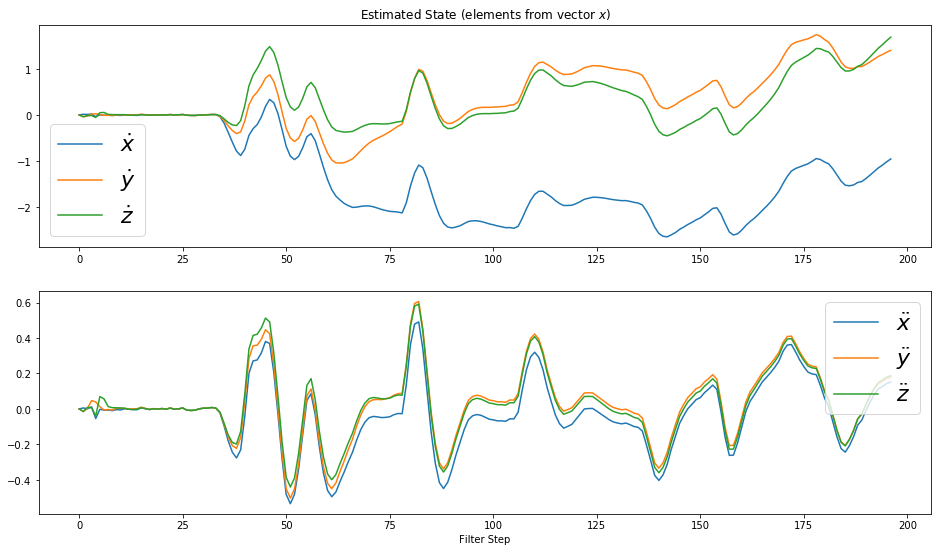

In [203]:
# Estimated State
fig = plt.figure(figsize=(16,9))
plt.subplot(211)
plt.title('Estimated State (elements from vector $x$)')
plt.plot(range(len(measurements[0])),dxt, label='$\dot x$')
plt.plot(range(len(measurements[0])),dyt, label='$\dot y$')
plt.plot(range(len(measurements[0])),dzt, label='$\dot z$')
plt.legend(loc='best',prop={'size':22})

plt.subplot(212)
plt.plot(range(len(measurements[0])),ddxt, label='$\ddot x$')
plt.plot(range(len(measurements[0])),ddyt, label='$\ddot y$')
plt.plot(range(len(measurements[0])),ddzt, label='$\ddot z$')

plt.xlabel('Filter Step')
plt.ylabel('')
plt.legend(loc='best',prop={'size':22})
plt.show()

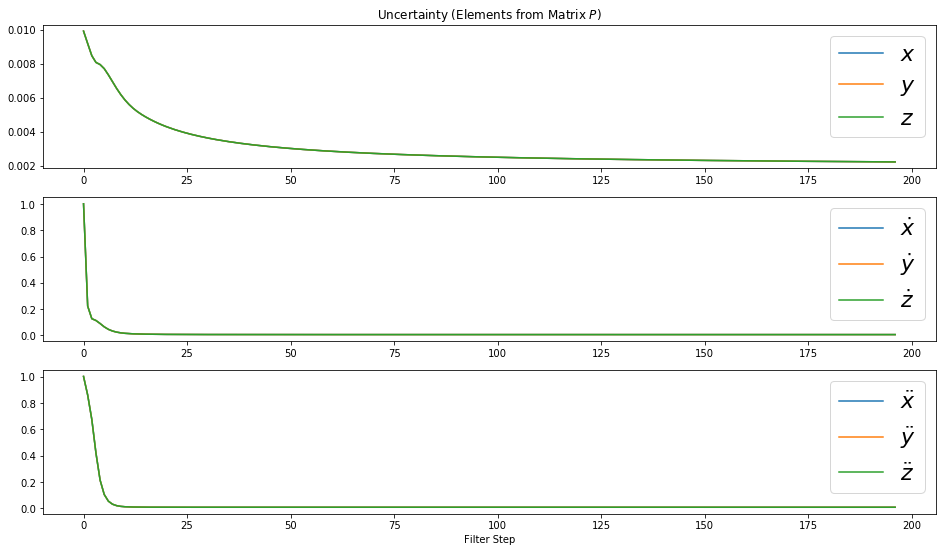

In [204]:
# Uncertainty
fig = plt.figure(figsize=(16,9))
plt.subplot(311)
plt.plot(range(len(measurements[0])),Px, label='$x$')
plt.plot(range(len(measurements[0])),Py, label='$y$')
plt.plot(range(len(measurements[0])),Pz, label='$z$')
plt.title('Uncertainty (Elements from Matrix $P$)')
plt.legend(loc='best',prop={'size':22})
plt.subplot(312)
plt.plot(range(len(measurements[0])),Pdx, label='$\dot x$')
plt.plot(range(len(measurements[0])),Pdy, label='$\dot y$')
plt.plot(range(len(measurements[0])),Pdz, label='$\dot z$')
plt.legend(loc='best',prop={'size':22})

plt.subplot(313)
plt.plot(range(len(measurements[0])),Pddx, label='$\ddot x$')
plt.plot(range(len(measurements[0])),Pddy, label='$\ddot y$')
plt.plot(range(len(measurements[0])),Pddz, label='$\ddot z$')

plt.xlabel('Filter Step')
plt.ylabel('')
plt.legend(loc='best',prop={'size':22})
plt.show()

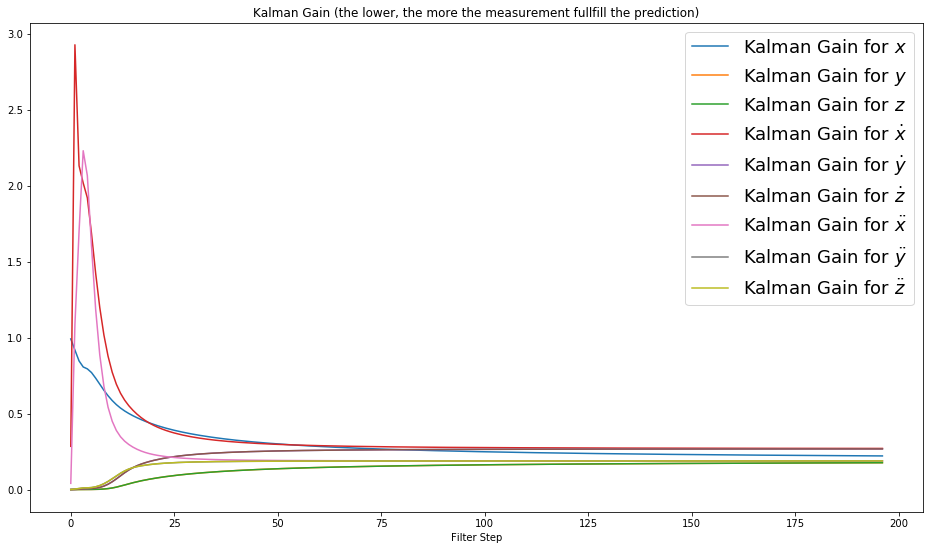

In [205]:
# Kalman Gains
fig = plt.figure(figsize=(16,9))
plt.plot(range(len(measurements[0])),Kx, label='Kalman Gain for $x$')
plt.plot(range(len(measurements[0])),Ky, label='Kalman Gain for $y$')
plt.plot(range(len(measurements[0])),Kz, label='Kalman Gain for $z$')
plt.plot(range(len(measurements[0])),Kdx, label='Kalman Gain for $\dot x$')
plt.plot(range(len(measurements[0])),Kdy, label='Kalman Gain for $\dot y$')
plt.plot(range(len(measurements[0])),Kdz, label='Kalman Gain for $\dot z$')
plt.plot(range(len(measurements[0])),Kddx, label='Kalman Gain for $\ddot x$')
plt.plot(range(len(measurements[0])),Kddy, label='Kalman Gain for $\ddot y$')
plt.plot(range(len(measurements[0])),Kddz, label='Kalman Gain for $\ddot z$')

plt.xlabel('Filter Step')
plt.ylabel('')
plt.title('Kalman Gain (the lower, the more the measurement fullfill the prediction)')
plt.legend(loc='best',prop={'size':18})
plt.show()

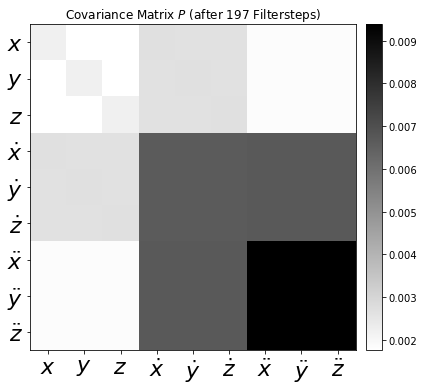

In [206]:
# Covariance Matrix
fig = plt.figure(figsize=(6, 6))
im = plt.imshow(P, interpolation="none", cmap=plt.get_cmap('binary'))
plt.title('Covariance Matrix $P$ (after %i Filtersteps)' % m)
ylocs, ylabels = plt.yticks()
# set the locations of the yticks
plt.yticks(np.arange(10))
# set the locations and labels of the yticks
plt.yticks(np.arange(9),('$x$', '$y$', '$z$', '$\dot x$', '$\dot y$', '$\dot z$', '$\ddot x$', '$\ddot y$', '$\ddot z$'), fontsize=22)

xlocs, xlabels = plt.xticks()
# set the locations of the yticks
plt.xticks(np.arange(7))
# set the locations and labels of the yticks
plt.xticks(np.arange(9),('$x$', '$y$', '$z$', '$\dot x$', '$\dot y$', '$\dot z$', '$\ddot x$', '$\ddot y$', '$\ddot z$'), fontsize=22)

plt.xlim([-0.5,8.5])
plt.ylim([8.5, -0.5])

from mpl_toolkits.axes_grid1 import make_axes_locatable
divider = make_axes_locatable(plt.gca())
cax = divider.append_axes("right", "5%", pad="3%")
plt.colorbar(im, cax=cax)


plt.tight_layout()
plt.show()

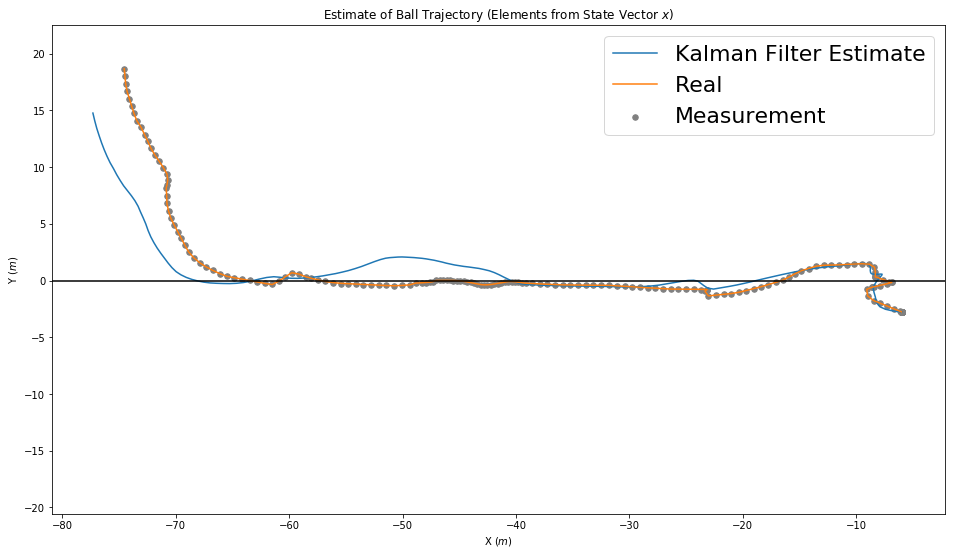

In [207]:
# Position
fig = plt.figure(figsize=(16,9))

plt.plot(xt,zt, label='Kalman Filter Estimate')
plt.scatter(Xm,Zm, label='Measurement', c='gray', s=30)
plt.plot(Xr, Zr, label='Real')
plt.title('Estimate of Ball Trajectory (Elements from State Vector $x$)')
plt.legend(loc='best',prop={'size':22})
plt.axhline(0, color='k')
plt.axis('equal')
plt.xlabel('X ($m$)')
plt.ylabel('Y ($m$)')
plt.ylim(0, 2);
plt.show()

-34.5204171142 3.46325938065 0.884631607195


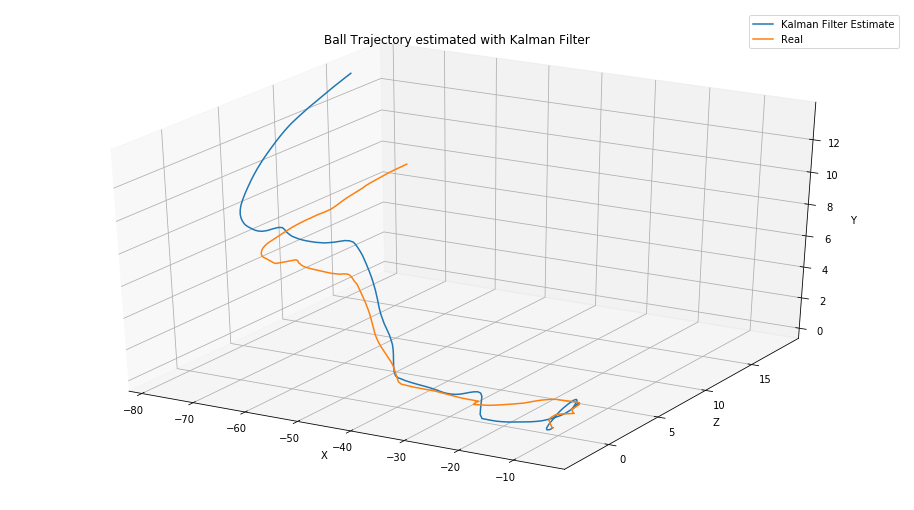

In [208]:
fig = plt.figure(figsize=(16,9))
ax = fig.add_subplot(111, projection='3d')
ax.plot(xt,zt,yt, label='Kalman Filter Estimate')
ax.plot(Xr, Zr, Yr, label='Real')
ax.set_xlabel('X')
ax.set_ylabel('Z')
ax.set_zlabel('Y')
ax.legend()
plt.title('Ball Trajectory estimated with Kalman Filter')

# Axis equal
max_range = np.array([Xm.max()-Xm.min(), Ym.max()-Ym.min(), Zm.max()-Zm.min()]).max() / 3.0
mean_x = Xm.mean()
mean_y = Ym.mean()
mean_z = Zm.mean()
print(mean_x,mean_y,mean_z)
# ax.set_xlim(mean_x - max_range, mean_x + max_range)
# ax.set_ylim(mean_z - max_range, mean_z + max_range)
# ax.set_zlim(mean_y, mean_z + 15)
plt.show()

In [209]:
# distance calculate
dist = np.sqrt((Xm-xt)**2 + (Ym-yt)**2 + (Zm-zt)**2)
print('Estimated Position is %.2fm away from real position.' % dist.mean())

Estimated Position is 8.20m away from real position.
